<a href="https://colab.research.google.com/github/DrAlexSanz/NLP-SPEC-C4/blob/main/W1/BLEU_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating the Bilingual Evaluation Understudy (BLEU) score: Ungraded Lab
In this ungraded lab, we will implement a popular metric for evaluating the quality of machine-translated text: the BLEU score proposed by Kishore Papineni, et al. In their 2002 paper "BLEU: a Method for Automatic Evaluation of Machine Translation", the BLEU score works by comparing "candidate" text to one or more "reference" translations. The result is better the closer the score is to 1. Let's see how to get this value in the following sections.

# Part 1: BLEU Score
## 1.1 Importing the Libraries
We will first start by importing the Python libraries we will use in the first part of this lab. For learning, we will implement our own version of the BLEU Score using Numpy. To verify that our implementation is correct, we will compare our results with those generated by the SacreBLEU library. This package provides hassle-free computation of shareable, comparable, and reproducible BLEU scores. It also knows all the standard test sets and handles downloading, processing, and tokenization.

In [1]:
import numpy as np                  # import numpy to make numerical computations.
import nltk                         # import NLTK to handle simple NL tasks like tokenization.
nltk.download("punkt")
from nltk.util import ngrams
from collections import Counter     # import the Counter module.
!pip install 'sacrebleu'           # install the sacrebleu package.
import sacrebleu                    # import sacrebleu in order compute the BLEU score.
import matplotlib.pyplot as plt     # import pyplot in order to make some illustrations.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 71kB 3.8MB/s 


1.2 Defining the BLEU Score
You have seen the formula for calculating the BLEU score in this week's lectures. More formally, we can express the BLEU score as:

$$BLEU = BP\Bigl(\prod_{i=1}^{4}precision_i\Bigr)^{(1/4)}$$
with the Brevity Penalty and precision defined as:

$$BP = min\Bigl(1, e^{(1-({ref}/{cand}))}\Bigr)$$$$precision_i = \frac {\sum_{snt \in{cand}}\sum_{i\in{snt}}min\Bigl(m^{i}_{cand}, m^{i}_{ref}\Bigr)}{w^{i}_{t}}$$
where:

* $m^{i}_{cand}$, is the count of i-gram in candidate matching the reference translation.
* $m^{i}_{ref}$, is the count of i-gram in the reference translation.
* $w^{i}_{t}$, is the total number of i-grams in candidate translation.

# 1.3 Explaining the BLEU score
## Brevity Penalty (example):

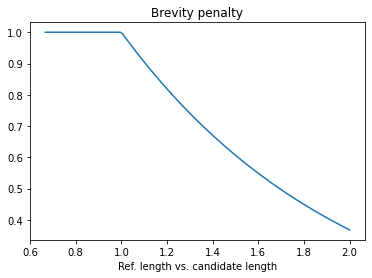

In [7]:
ref_length = np.ones(100)
cand_length = np.linspace(1.5, 0.5, 100)
x = ref_length / cand_length
y = 1 - x
y = np.exp(y)
y = np.minimum(np.ones(y.shape), y)

plt.plot(x, y)
plt.title("Brevity penalty");
plt.xlabel("Ref. length vs. candidate length"); # If candidate is too short, it's penalized

The brevity penalty penalizes generated translations that are too short compared to the closest reference length with an exponential decay. The brevity penalty compensates for the fact that the BLEU score has no recall term.

## 1.4 Example Calculations of the BLEU score
In this example we will have a reference translation and 2 candidates translations. We will tokenize all sentences using the NLTK package introduced in Course 2 of this NLP specialization.

In [8]:
reference = "The NASA Opportunity rover is battling a massive dust storm on planet Mars."
candidate_1 = "The Opportunity rover is combating a big sandstorm on planet Mars."
candidate_2 = "A NASA rover is fighting a massive storm on planet Mars."